# K Means Clustering Algorithm

In [2]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
#Creating Dataset for clustering
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000,centers=3,n_features=2)

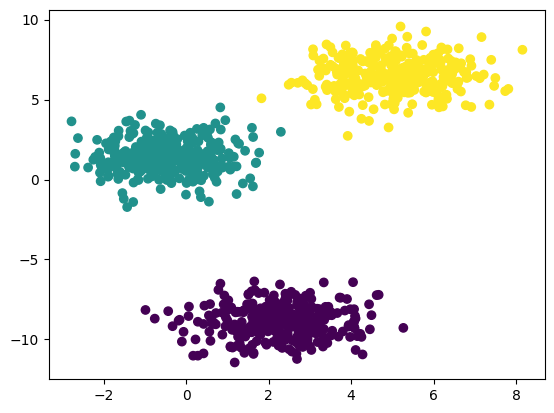

In [6]:
# Visualizing Dataset
plt.scatter(X[:,0],X[:,1],c=y)

In [7]:
# Train,test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_train = train_test_split(X,y,test_size=0.33,random_state=42)

In [8]:
# Standardization Dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Clustering
from sklearn.cluster import KMeans

Text(0, 0.5, 'WCSS')

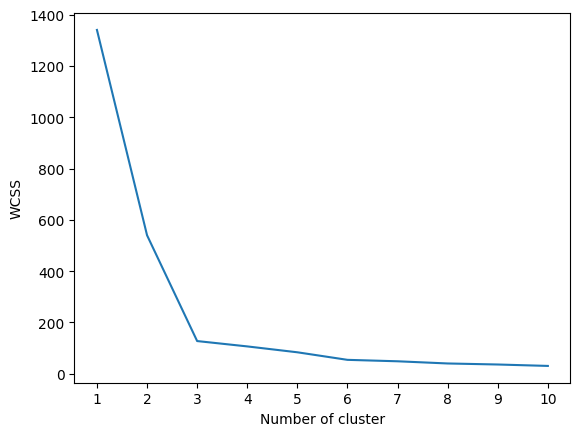

In [ ]:
# Performing Elbow Method
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)
# Plotting elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
    

In [13]:
# clustering and predict
kmeans = KMeans(n_clusters=3,init="k-means++")
clustered= kmeans.fit_predict(X_train_scaled)

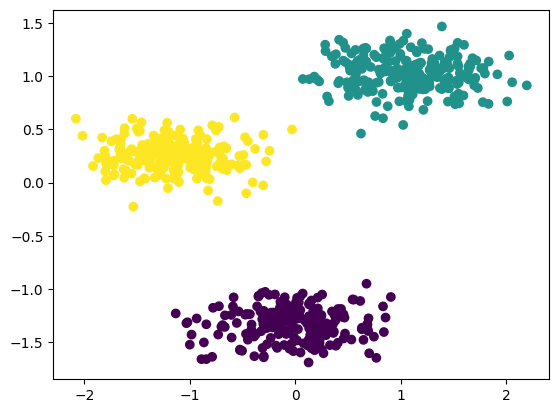

In [15]:
# Visualizing after clustering
plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=clustered)


## Method of Validating K Value

### Knee Locator

In [17]:
# Installing Kneed
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [20]:
# Import and validating k value with knee locator
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [22]:
k_value = kl.elbow
print(k_value)

3


### Silhoutte Scoring

In [23]:
from sklearn.metrics import silhouette_score

In [28]:
silhouette_score_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_score_coefficients.append(score)

In [29]:
silhouette_score_coefficients

[0.591692312457375,
 0.7452551128731921,
 0.6358125067601413,
 0.5442460652474564,
 0.46680738862602744,
 0.443820711361648,
 0.48743893740962385,
 0.4195446735848432,
 0.4115492328365494]

Text(0, 0.5, 'Silhouette Coefficient')

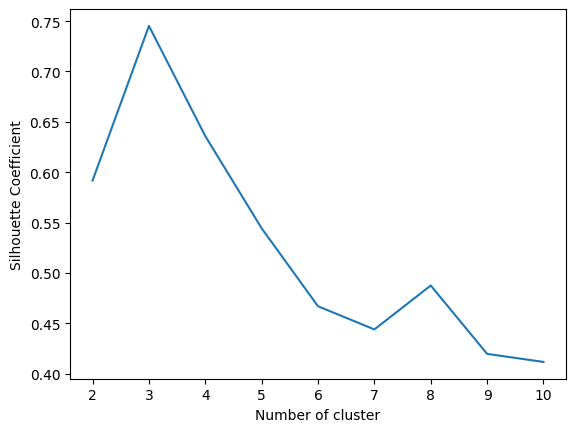

In [ ]:
# Plotting Silhoutte score
plt.plot(range(2,11),silhouette_score_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
# Use the highest coefficient value for k 
